In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
# adata = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/slideseq_mouse_lymphnode.h5ad')
adata = sc.read_h5ad('/Users/koush/Desktop/training_data/slideseq_mouse_lymphnode.h5ad')
adata

AnnData object with n_obs × n_vars = 24617 × 3604
    obs: 'cell_type', 'cell_type_int'
    obsm: 'X_spatial', 'spatial', 'tangram_ct_pred'
    layers: 'imputed_count', 'imputed_count_v0', 'normalized_count', 'raw_count'

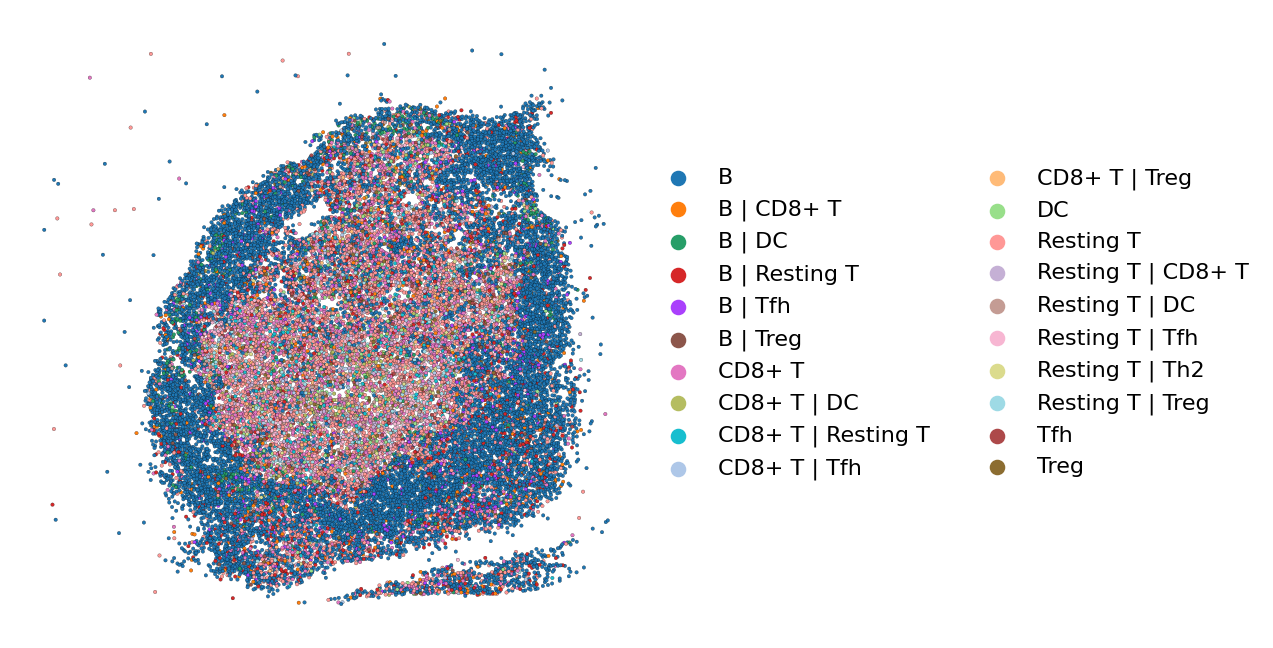

In [4]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams['figure.dpi'] = 160
sc.pl.embedding(adata, basis='spatial', color='cell_type', 
    frameon=False, edgecolor='black', s=10, linewidth=0.1, title='')

In [5]:
import sys
sys.path.append('../../src/')

In [6]:
import celloracle as co

%matplotlib inline
plt.rcParams["figure.figsize"] = (4, 4)
plt.rcParams['figure.dpi'] = 180

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [7]:
%%time

sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X')
sc.tl.umap(adata)
# sc.tl.leiden(adata, resolution=0.5)

CPU times: user 56.2 s, sys: 9.19 s, total: 1min 5s
Wall time: 47.3 s


In [8]:
adata.X.max()

521.0

In [9]:
adata.layers["raw_count"].max()

521.0

In [13]:
oracle = co.Oracle()

adata.X = adata.layers["raw_count"].copy()

oracle.import_anndata_as_raw_count(
    adata=adata,
    cluster_column_name="cell_type",
    embedding_name="X_umap"
)

oracle.pcs = [True]
oracle.k_knn_imputation = 1
oracle.knn = 1

In [14]:
base_GRN = co.data.load_mouse_promoter_base_GRN()
oracle.import_TF_data(TF_info_matrix=base_GRN)

Loading prebuilt promoter base-GRN. Version: mm10_gimmemotifsv5_fpr2


In [15]:
%%time

links = oracle.get_links(
    cluster_name_for_GRN_unit="cell_type", 
    alpha=10,
    verbose_level=2
)

  0%|          | 0/20 [00:00<?, ?it/s]

Inferring GRN for B...


  0%|          | 0/3348 [00:00<?, ?it/s]

  5%|▌         | 1/20 [07:02<2:13:52, 422.78s/it]

Inferring GRN for B | CD8+ T...


  0%|          | 0/3348 [00:00<?, ?it/s]

 10%|█         | 2/20 [08:22<1:06:15, 220.89s/it]

Inferring GRN for B | DC...


  0%|          | 0/3348 [00:00<?, ?it/s]

 15%|█▌        | 3/20 [09:41<44:13, 156.12s/it]  

Inferring GRN for B | Resting T...


  0%|          | 0/3348 [00:00<?, ?it/s]

 20%|██        | 4/20 [11:01<33:35, 125.94s/it]

Inferring GRN for B | Tfh...


  0%|          | 0/3348 [00:00<?, ?it/s]

 25%|██▌       | 5/20 [12:18<27:09, 108.60s/it]

Inferring GRN for B | Treg...


  0%|          | 0/3348 [00:00<?, ?it/s]

 30%|███       | 6/20 [13:39<23:09, 99.24s/it] 

Inferring GRN for CD8+ T...


  0%|          | 0/3348 [00:00<?, ?it/s]

 35%|███▌      | 7/20 [15:14<21:11, 97.83s/it]

Inferring GRN for CD8+ T | DC...


  0%|          | 0/3348 [00:00<?, ?it/s]

 40%|████      | 8/20 [16:35<18:26, 92.19s/it]

Inferring GRN for CD8+ T | Resting T...


  0%|          | 0/3348 [00:00<?, ?it/s]

 45%|████▌     | 9/20 [17:53<16:08, 88.05s/it]

Inferring GRN for CD8+ T | Tfh...


  0%|          | 0/3348 [00:00<?, ?it/s]

 50%|█████     | 10/20 [19:12<14:11, 85.11s/it]

Inferring GRN for CD8+ T | Treg...


  0%|          | 0/3348 [00:00<?, ?it/s]

 55%|█████▌    | 11/20 [20:31<12:28, 83.13s/it]

Inferring GRN for DC...


  0%|          | 0/3348 [00:00<?, ?it/s]

 60%|██████    | 12/20 [21:49<10:52, 81.62s/it]

Inferring GRN for Resting T...


  0%|          | 0/3348 [00:00<?, ?it/s]

 65%|██████▌   | 13/20 [23:27<10:07, 86.73s/it]

Inferring GRN for Resting T | CD8+ T...


  0%|          | 0/3348 [00:00<?, ?it/s]

 70%|███████   | 14/20 [24:46<08:25, 84.22s/it]

Inferring GRN for Resting T | DC...


  0%|          | 0/3348 [00:00<?, ?it/s]

 75%|███████▌  | 15/20 [26:04<06:52, 82.55s/it]

Inferring GRN for Resting T | Tfh...


  0%|          | 0/3348 [00:00<?, ?it/s]

 80%|████████  | 16/20 [27:23<05:25, 81.39s/it]

Inferring GRN for Resting T | Th2...


  0%|          | 0/3348 [00:00<?, ?it/s]

 85%|████████▌ | 17/20 [28:41<04:01, 80.40s/it]

Inferring GRN for Resting T | Treg...


  0%|          | 0/3348 [00:00<?, ?it/s]

 90%|█████████ | 18/20 [30:00<02:39, 79.88s/it]

Inferring GRN for Tfh...


  0%|          | 0/3348 [00:00<?, ?it/s]

 95%|█████████▌| 19/20 [31:18<01:19, 79.45s/it]

Inferring GRN for Treg...


  0%|          | 0/3348 [00:00<?, ?it/s]

100%|██████████| 20/20 [32:37<00:00, 97.86s/it]

CPU times: user 17min 59s, sys: 1min 9s, total: 19min 8s
Wall time: 32min 37s


In [18]:
links.filter_links()
oracle.get_cluster_specific_TFdict_from_Links(links_object=links)
oracle.fit_GRN_for_simulation(
    alpha=10, 
    use_cluster_specific_TFdict=True
)

  0%|          | 0/20 [00:00<?, ?it/s]

In [19]:
import pickle

with open('/Users/koush/Desktop/training_data/slideseq_mouse_lymphnode_colinks.pkl', 'wb') as f:
    pickle.dump(links.links_dict, f)

In [20]:

oracle.to_hdf5("/Users/koush/Desktop/training_data/slideseq_mouse_lymphnode.celloracle.oracle")
links.to_hdf5(file_path="/Users/koush/Desktop/training_data/slideseq_mouse_lymphnode.celloracle.links")